In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **VISUALIZACIÓN**

In [2]:
df = pd.read_csv('./data/df_final.csv')

##### **GRÁFICO 1: PROPORCIONES DE VENTAS POR REGÍÓN**

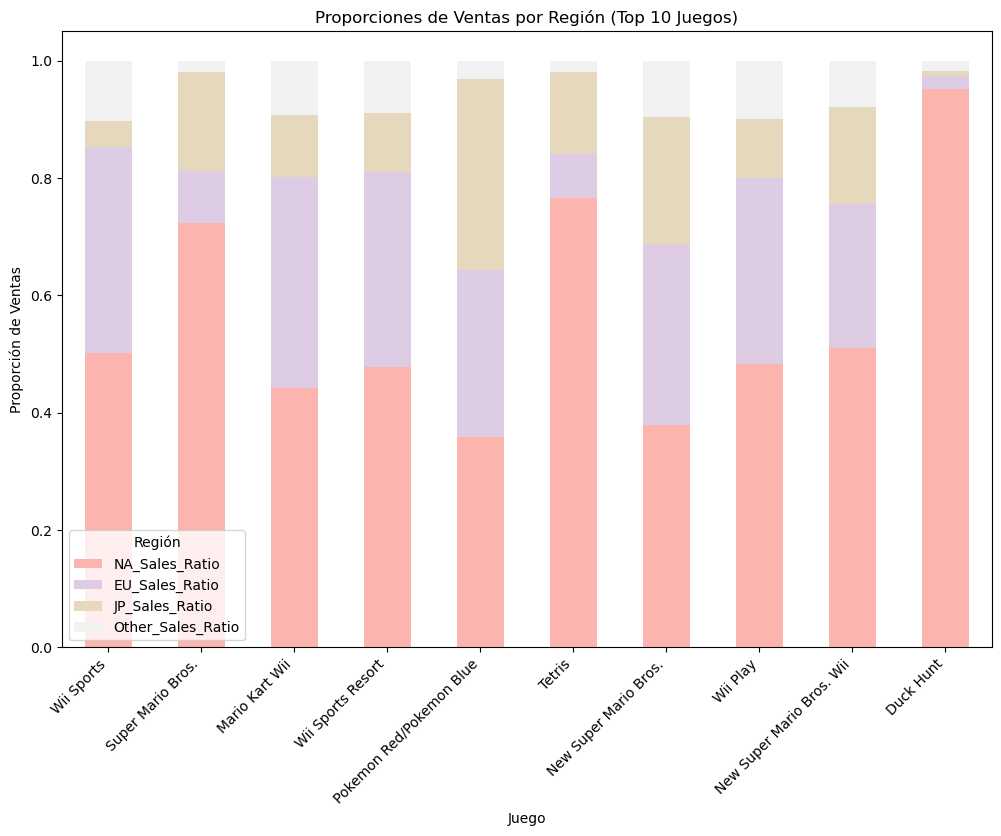

In [28]:
df_top_ventas = df.nlargest(10, 'Global_Sales')  # Tomar los 10 juegos con mayores ventas
df_top_ventas.set_index('Name')[['NA_Sales_Ratio', 'EU_Sales_Ratio', 'JP_Sales_Ratio', 'Other_Sales_Ratio']].plot(
    kind='bar', stacked=True, figsize=(12, 8), colormap='Pastel1')
plt.title('Proporciones de Ventas por Región (Top 10 Juegos)')
plt.xlabel('Juego')
plt.ylabel('Proporción de Ventas')
plt.legend(title='Región')
plt.xticks(rotation=45, ha='right')
plt.show()

##### **GRÁFICO 2: TENDENCIAS DE VENTAS GLOBALES POR AÑO**

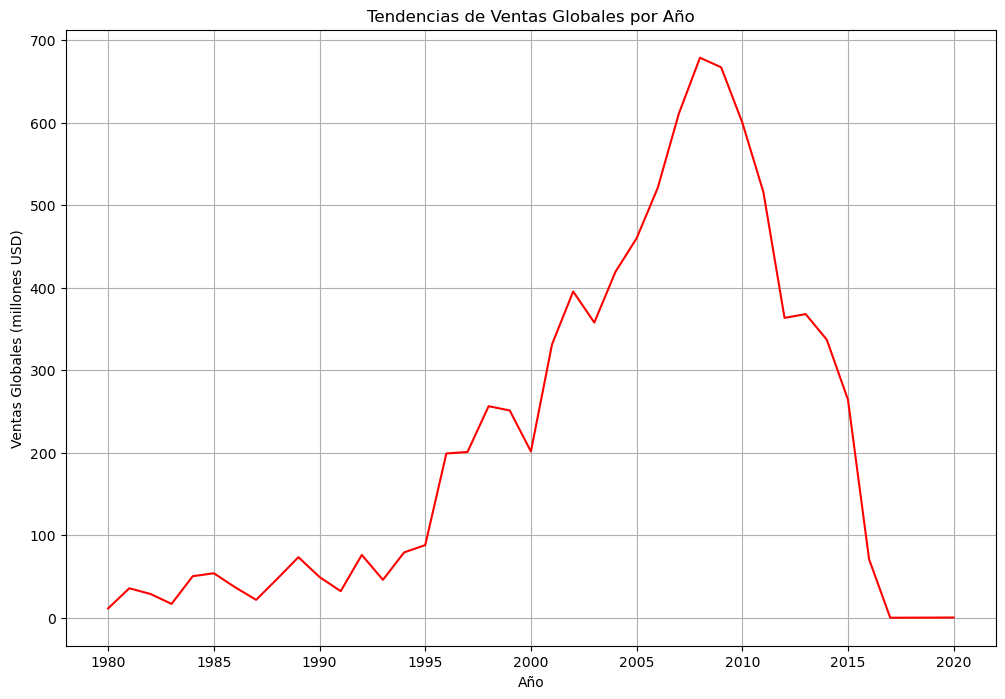

In [32]:
ventas_por_año = df.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(12, 8))
ventas_por_año.plot(kind='line', color='red')
plt.title('Tendencias de Ventas Globales por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (millones USD)')
plt.grid(True)
plt.show()

##### **GRÁFICO 3: COMPARACIÓN DE VENTAS ENTRE NINTENDO Y XBOX AÑO 2015**

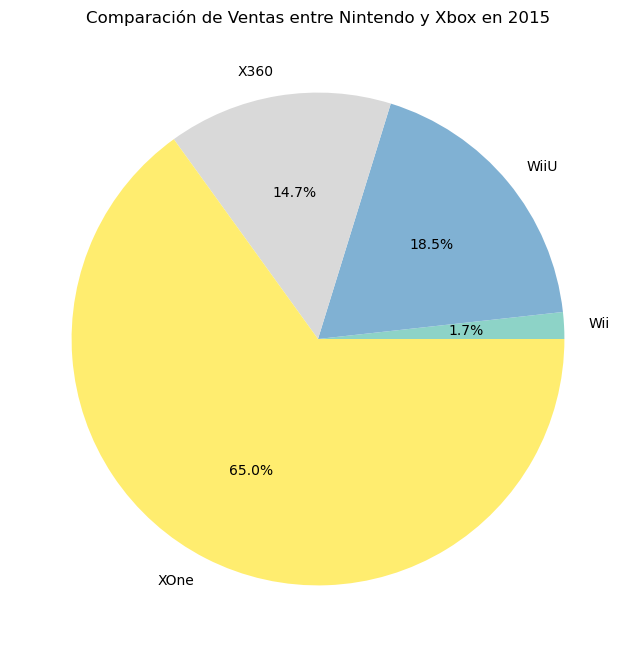

In [54]:
year = 2015
df_year = df[df['Year'] == year]

# Filtrando solo Nintendo y Xbox
platforms = ['Wii', 'NES', 'GB', 'GBA', 'N64', 'GC', 'WiiU', 'Switch', 'XB', 'X360', 'XOne', 'XSX']
df_nintendo_xbox = df_year[df_year['Platform'].isin(platforms)]

# Se agrupa por plataforma y se suma las ventas globales
ventas_por_plataforma = df_nintendo_xbox.groupby('Platform')['Global_Sales'].sum()

# Gráfico Torta
plt.figure(figsize=(8, 8))
ventas_por_plataforma.plot(kind='pie', autopct='%1.1f%%', colormap='Set3')
plt.title(f'Comparación de Ventas entre Nintendo y Xbox en {year}')
plt.ylabel('')
plt.show()

##### **GRÁFICO 4: COMPARACIÓN HISTÓRICA DE VENTAS DE CONSOLAS WII, XBOX 360 Y PLAYSTATION 2**

<Figure size 1200x800 with 0 Axes>

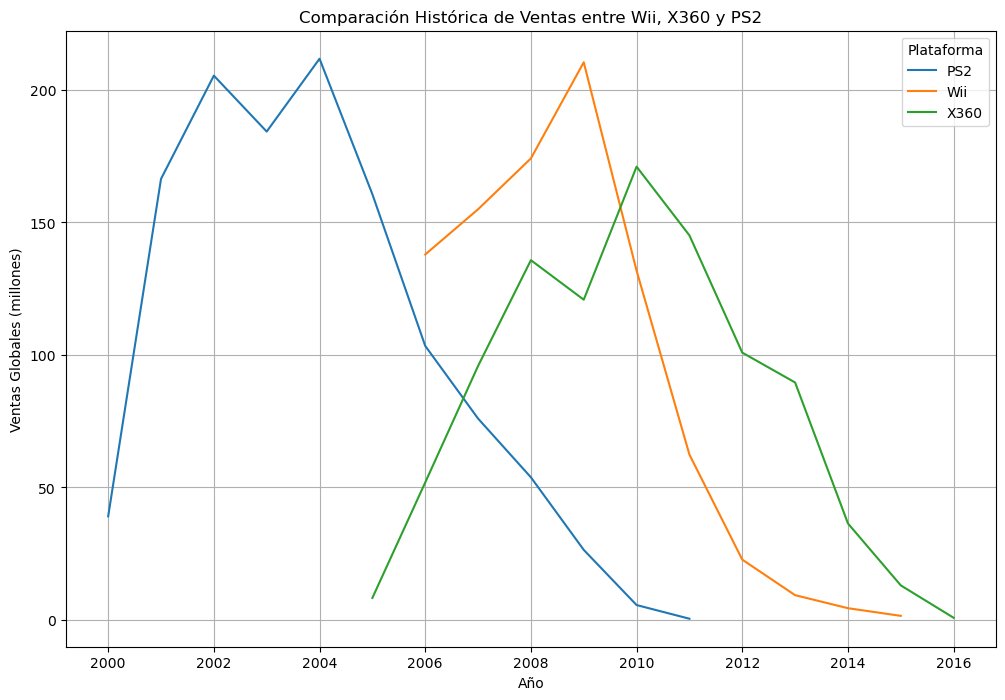

In [60]:
# Filtrando los datos para Wii, X360, y PS2
plataformas = ['Wii', 'X360', 'PS2']
df_filtrado = df[df['Platform'].isin(plataformas)]

# Agrupando por año y plataforma, y sumar las ventas globales
ventas = df_filtrado.groupby(['Year', 'Platform'])['Global_Sales'].sum().unstack()

plt.figure(figsize=(12, 8))
ventas.plot(kind='line', figsize=(12, 8))
plt.title('Comparación Histórica de Ventas entre Wii, X360 y PS2')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (millones)')
plt.grid(True)
plt.legend(title='Plataforma', loc='upper right')
plt.show()
